In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diabetes-prediction-using-ml/diabetes.csv


In [2]:
import numpy as np 
import pandas as pd
from sklearn.model_selection  import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn import svm
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
!ls ../input

diabetes-prediction-using-ml


In [4]:
original_data = pd.read_csv("/kaggle/input/diabetes-prediction-using-ml/diabetes.csv")

In [5]:
data = original_data

#1 means diabetic
#0 means not not diabetic

In [6]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
data.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [8]:
data['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

Means Total diabetic patients are 268  and 500 are non diabetic

In [9]:
#NOW LETS PROCESS THE DATA

x = data.drop(['Outcome'], axis = 1)
y = data['Outcome']

#scaling the data
scaler = StandardScaler()
x = scaler.fit_transform(x)

#split the data

train_X, test_X, train_Y, test_Y = train_test_split(x, y, stratify=y, random_state=0)


In [10]:
SVM_linear = svm.SVC(kernel="linear")
SVM_sigmoid =svm.SVC(kernel="sigmoid")

In [11]:
svm_linear_model = SVM_linear.fit(train_X, train_Y)
svm_sigmoid_model = SVM_sigmoid.fit(train_X, train_Y)

In [12]:
#testing the accuracy
#on training data
svm_linear_accuracy = accuracy_score(svm_linear_model.predict(train_X), train_Y)
print(f"SVM accuracy with linear model on trained data is {svm_linear_accuracy}")

svm_sigmoid_accuracy = accuracy_score(svm_sigmoid_model.predict(train_X), train_Y)
print(f"SVM accuracy with sigmoid model on trained data is {svm_sigmoid_accuracy}")

#on test data

svm_linear_test_accuracy = accuracy_score(svm_linear_model.predict(test_X), test_Y)
print(f"SVM accuracy with linear model is {svm_linear_test_accuracy}")

svm_sigmoid_test_accuracy = accuracy_score(svm_sigmoid_model.predict(test_X), test_Y)
print(f"SVM accuracy with sigmoid model is {svm_sigmoid_test_accuracy}")

SVM accuracy with linear model on trained data is 0.7743055555555556
SVM accuracy with sigmoid model on trained data is 0.6909722222222222
SVM accuracy with linear model is 0.7708333333333334
SVM accuracy with sigmoid model is 0.7760416666666666


In [13]:
#A system to predict diabetes based on given data

input_data = (1,173,74,0,0,36.8,0.088,38)
#change it a numpy array

input_data = np.asarray(input_data).reshape(1,-1)


#scaling the data
scaled_input = scaler.transform(input_data)

prediction = svm_linear_model.predict(scaled_input)
print(prediction)
if (prediction[0]==0):
    print("not diabetic");
elif (prediction[0]==1):
    print("diabetic")
else:
    print("something is wrong here")

[1]
diabetic


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


We can also plot the original data to find more information and to ignore some parameters which are not essential to improve our model. 

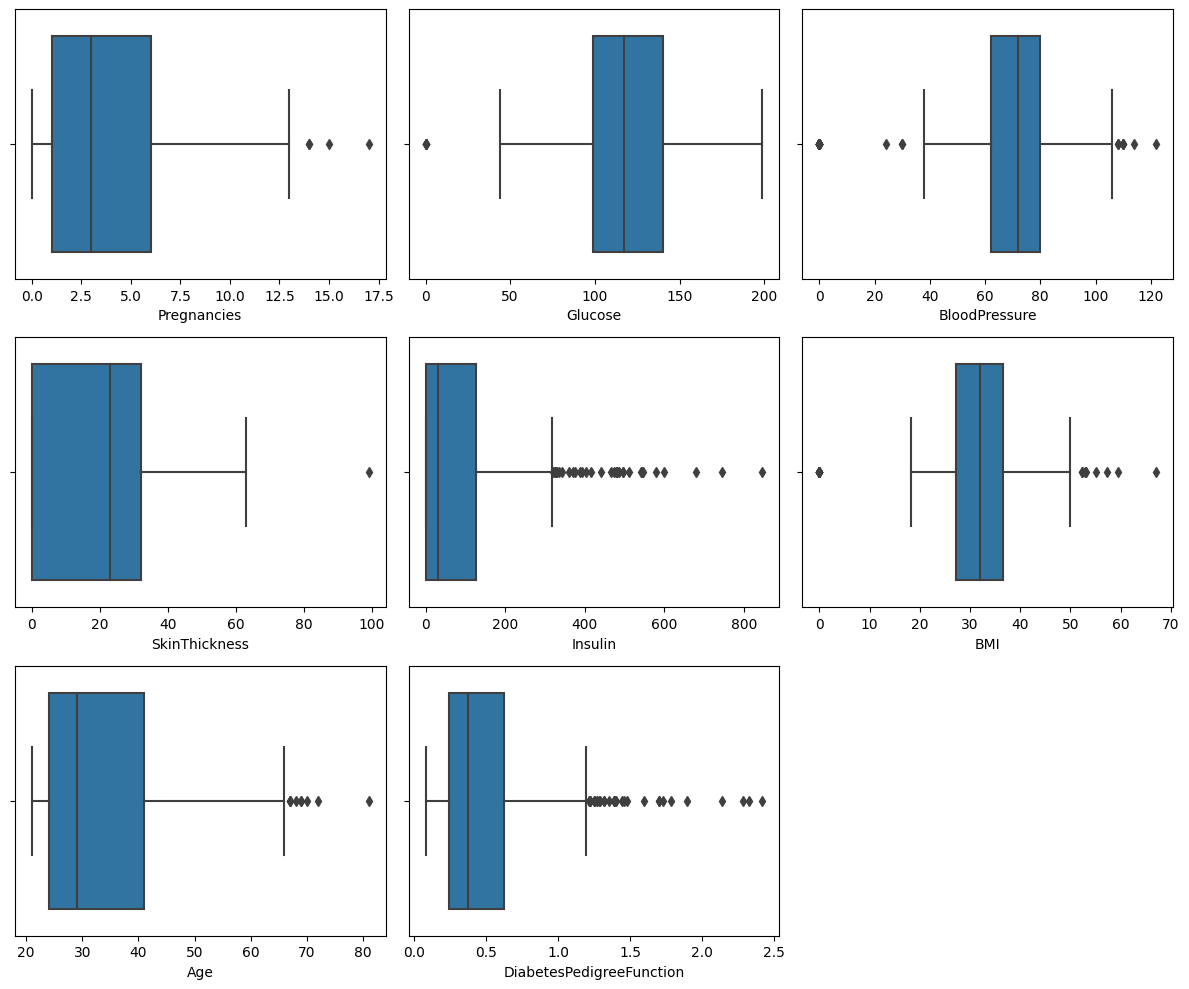

In [14]:
plt.figure(figsize=(12,10))
plt.subplot(3, 3, 1)
sns.boxplot(x=data['Pregnancies'])
plt.xlabel('Pregnancies')

plt.subplot(3, 3, 2)
sns.boxplot(x=data['Glucose'])
plt.xlabel('Glucose')

plt.subplot(3, 3, 3)
sns.boxplot(x=data['BloodPressure'])
plt.xlabel('BloodPressure')

plt.subplot(3, 3, 4)
sns.boxplot(x=data['SkinThickness'])
plt.xlabel('SkinThickness')

plt.subplot(3, 3, 5)
sns.boxplot(x=data['Insulin'])
plt.xlabel('Insulin')

plt.subplot(3, 3, 6)
sns.boxplot(x=data['BMI'])
plt.xlabel('BMI')

plt.subplot(3, 3, 7)
sns.boxplot(x=data['Age'])
plt.xlabel('Age')

plt.subplot(3, 3, 8)
sns.boxplot(x=data['DiabetesPedigreeFunction'])
plt.xlabel('DiabetesPedigreeFunction')

plt.tight_layout()
plt.show()



<Axes: >

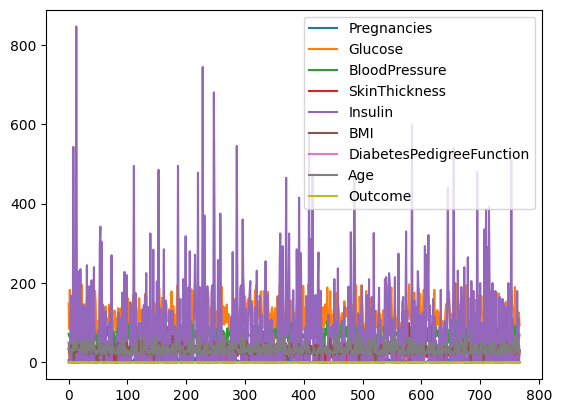

In [15]:
data.plot()

<function matplotlib.pyplot.show(close=None, block=None)>

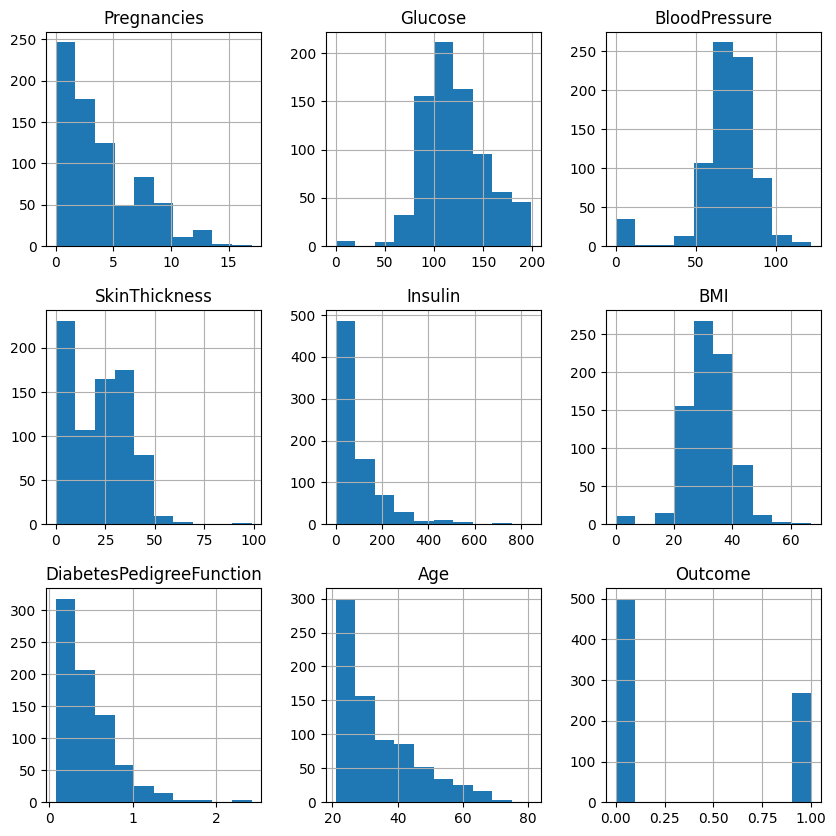

In [16]:

data.hist(figsize=(10,10))
plt.show

In [17]:
#FINDING CORRELATION IN FEATURES

correlation = data.corr()
correlation

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<Axes: >

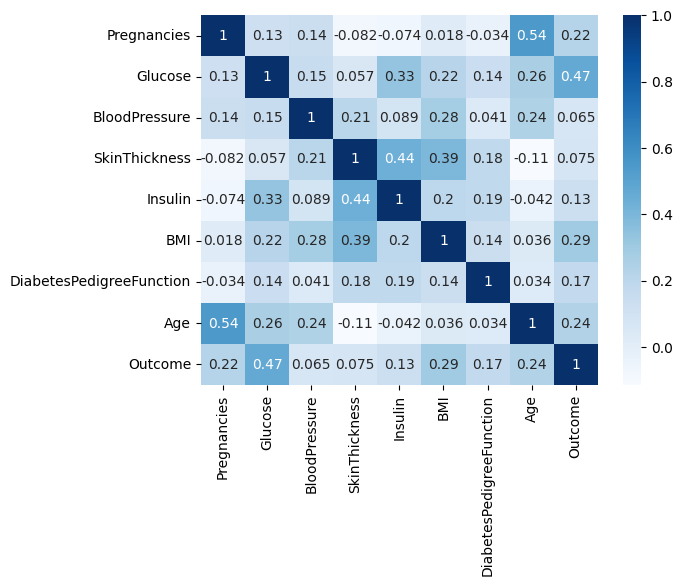

In [18]:
sns.heatmap(correlation, annot=True, cmap = "Blues")